In [1]:
#### import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
import numpy as np
warnings.filterwarnings('ignore')

Loaded processed_data for run run_268
Loaded processed_data for run run_270
Loaded processed_data for run run_272
Loaded processed_data for run run_274
Loaded processed_data for run run_276
Loaded processed_data for run run_279
Loaded processed_data for run run_281
Loaded processed_data for run run_269
Loaded processed_data for run run_271
Loaded processed_data for run run_273
Loaded processed_data for run run_275
Loaded processed_data for run run_277
Loaded processed_data for run run_278
Loaded processed_data for run run_280
Loaded processed_data for run run_282
[<processed_data_class.processed_data_class object at 0x7fb48b119810>, <processed_data_class.processed_data_class object at 0x7fb48b0d8ad0>, <processed_data_class.processed_data_class object at 0x7fb48b0a9d90>, <processed_data_class.processed_data_class object at 0x7fb48b0a9dd0>, <processed_data_class.processed_data_class object at 0x7fb48b1b83d0>, <processed_data_class.processed_data_class object at 0x7fb48b0a9c10>, <processe

<IPython.core.display.Javascript object>


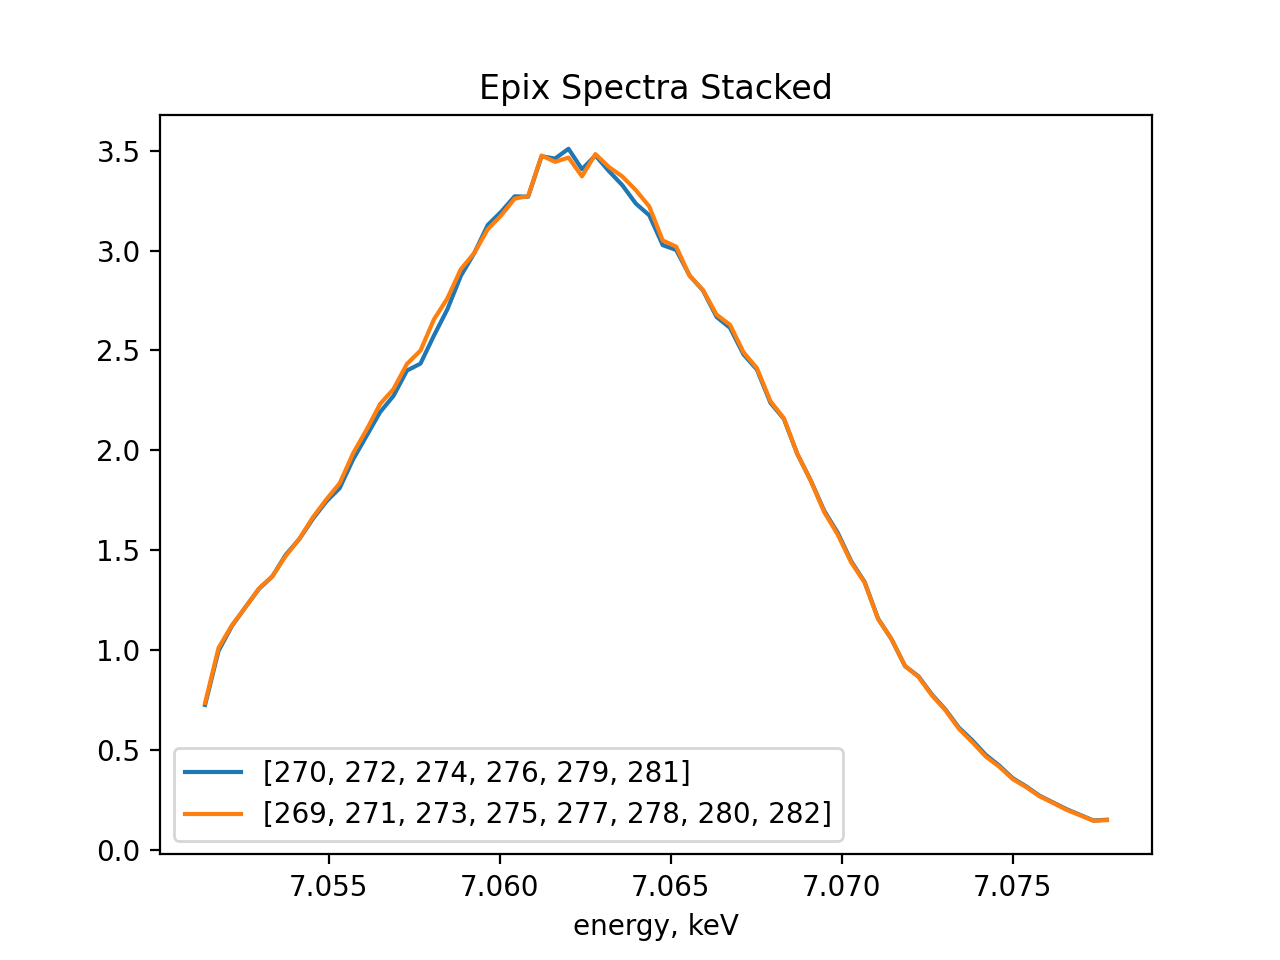

<IPython.core.display.Javascript object>


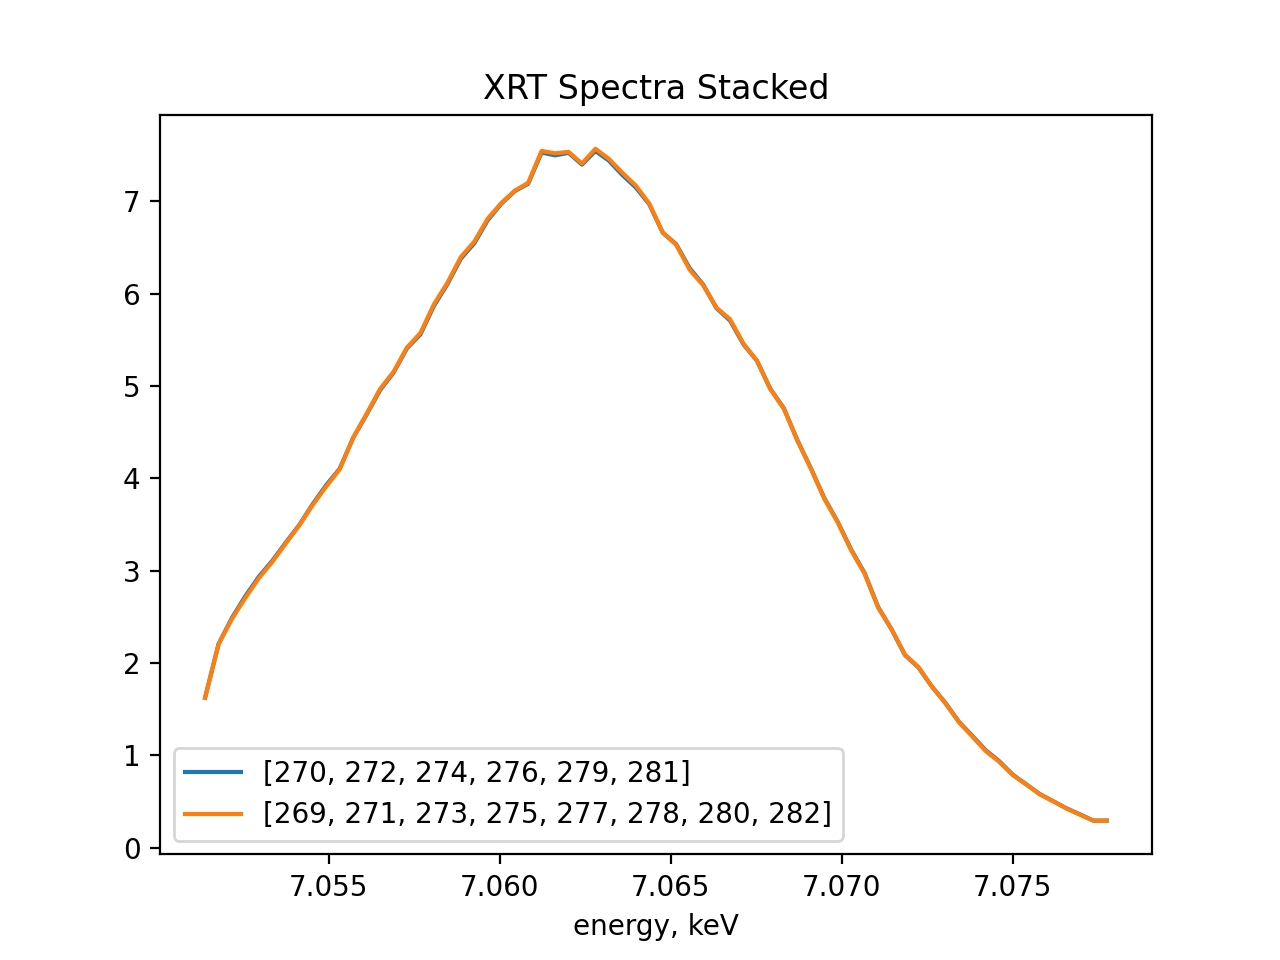

<IPython.core.display.Javascript object>


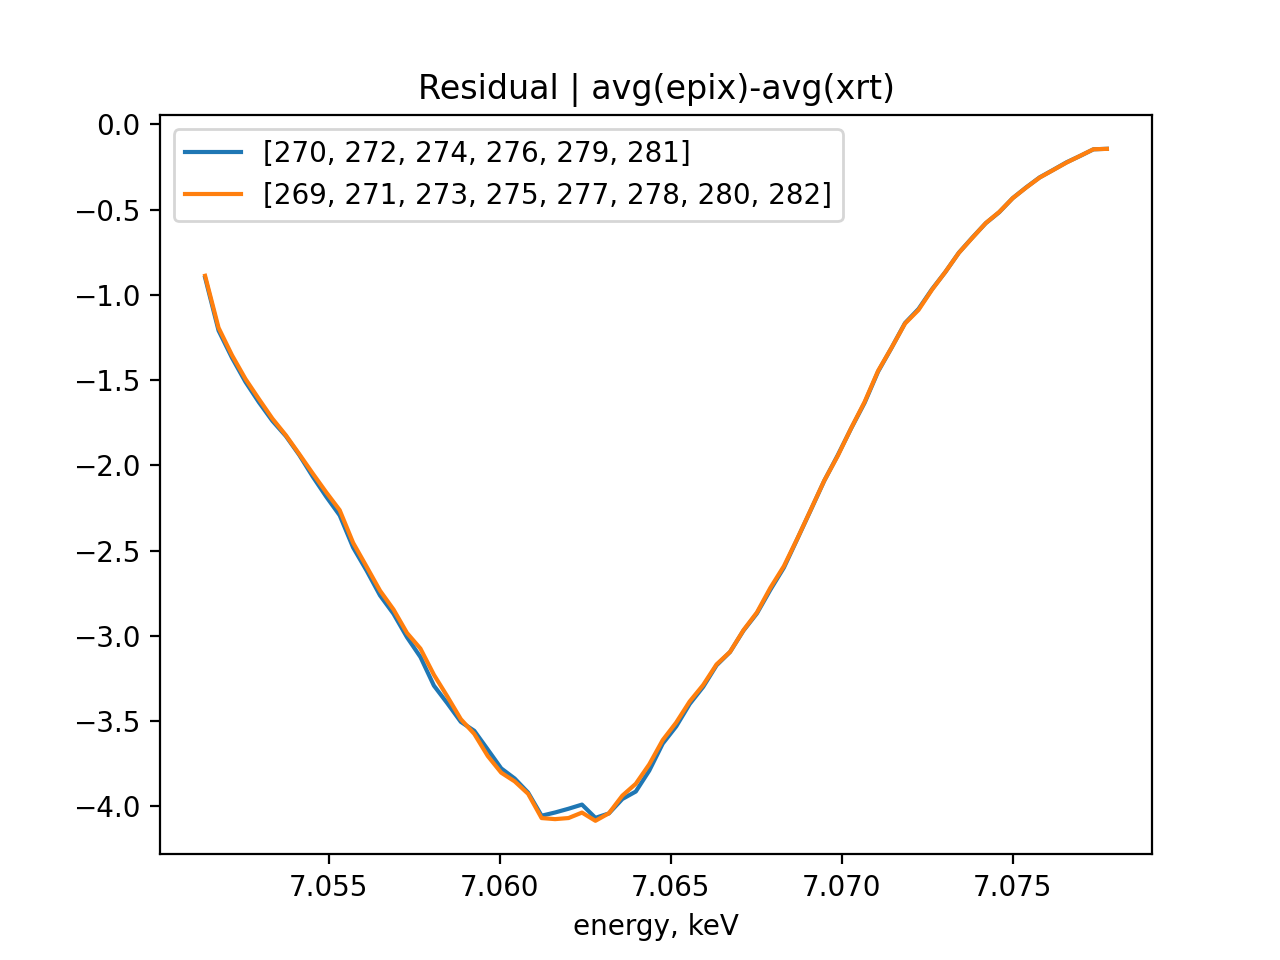

<IPython.core.display.Javascript object>


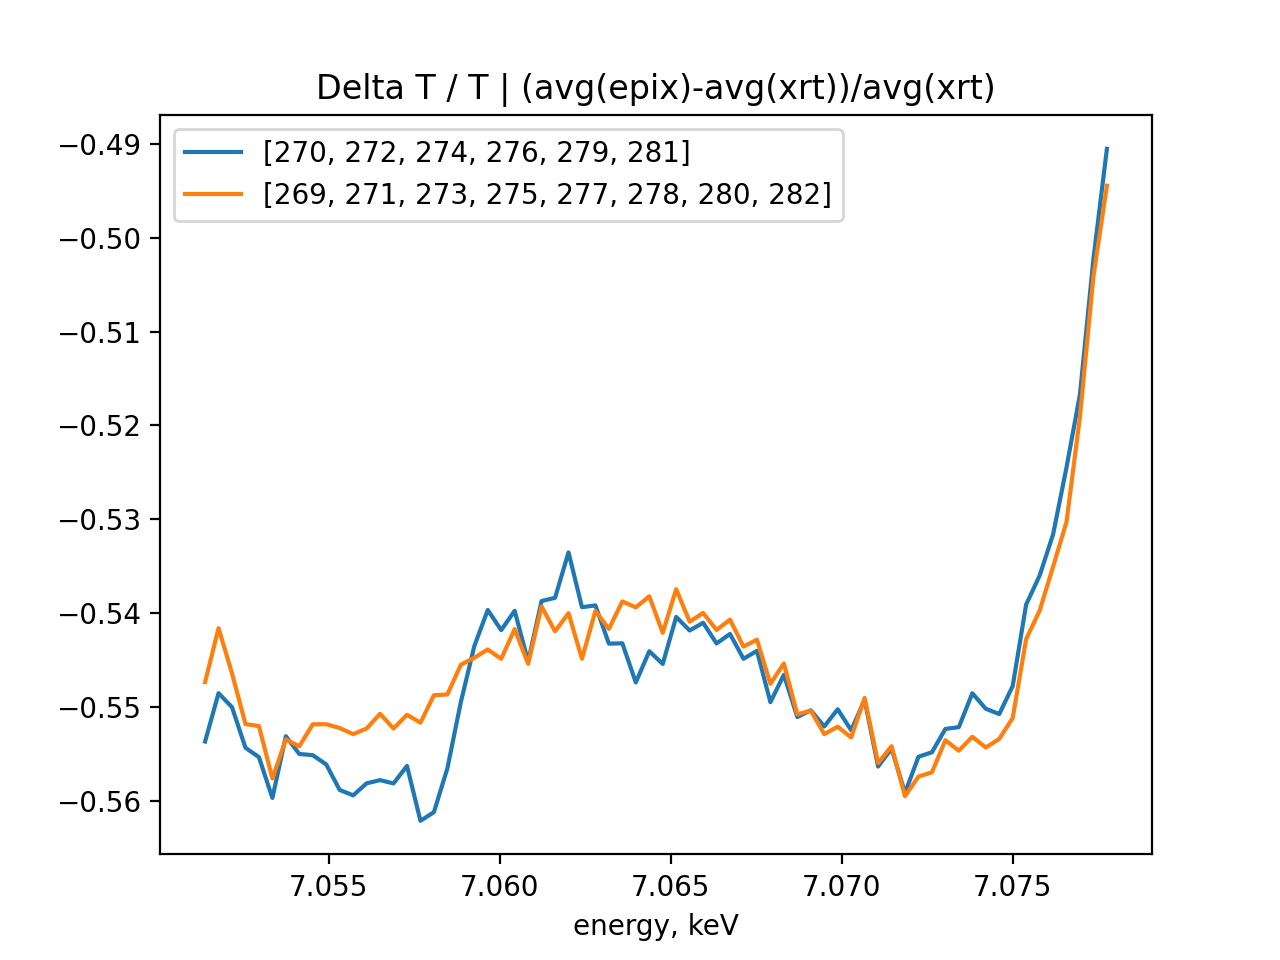

<IPython.core.display.Javascript object>


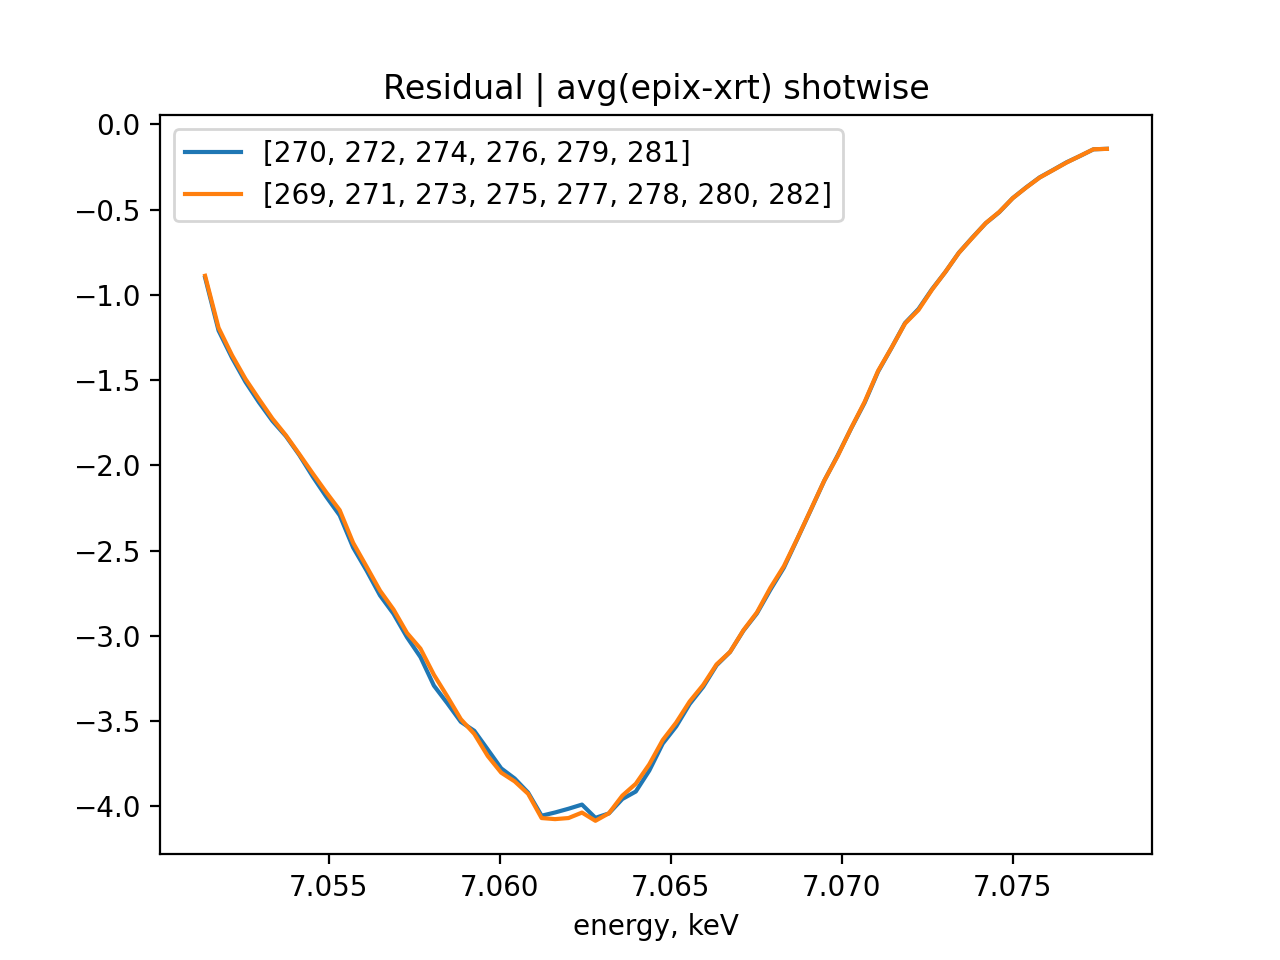

<IPython.core.display.Javascript object>


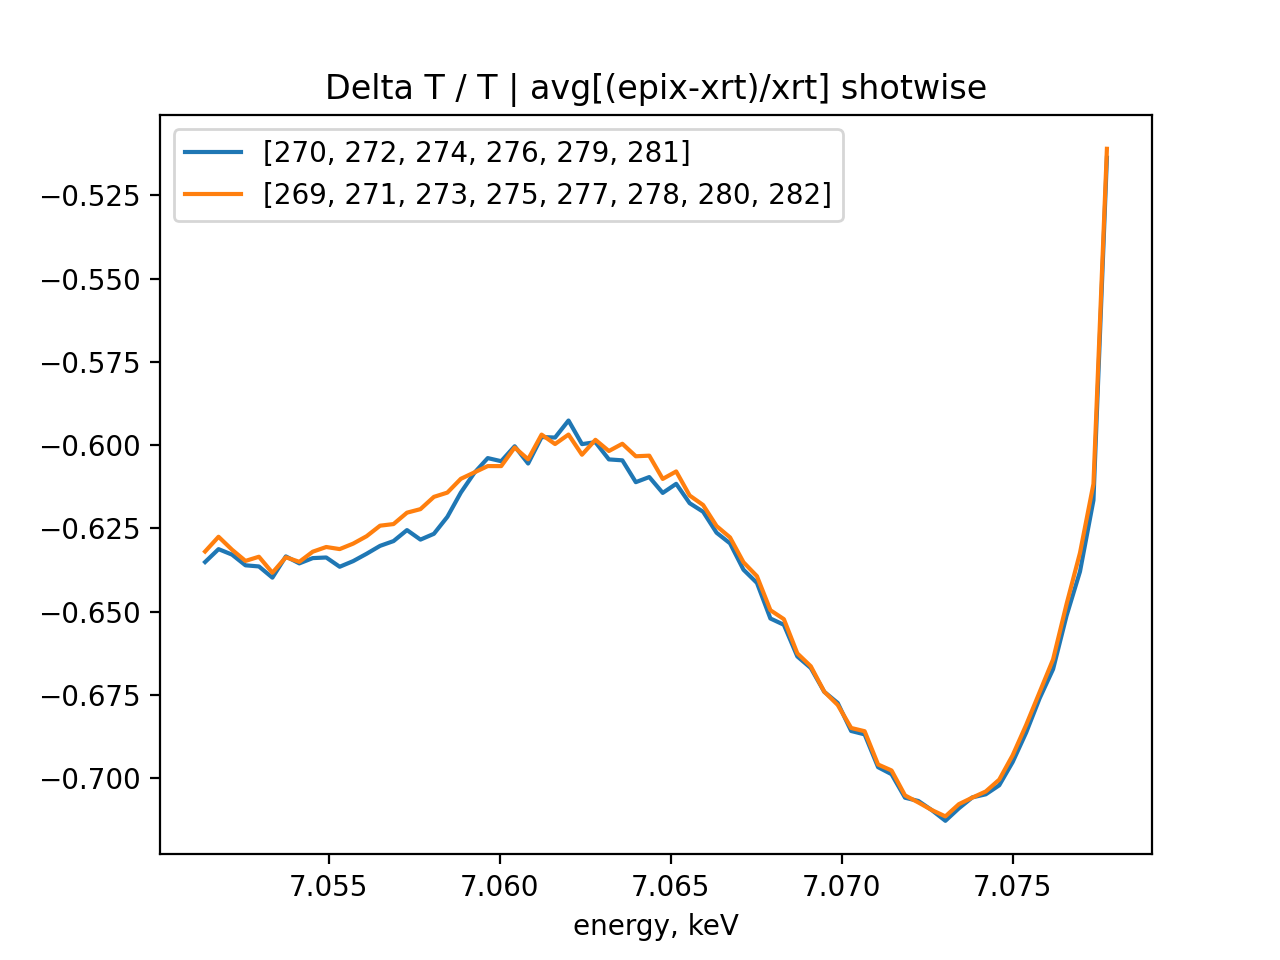

<IPython.core.display.Javascript object>


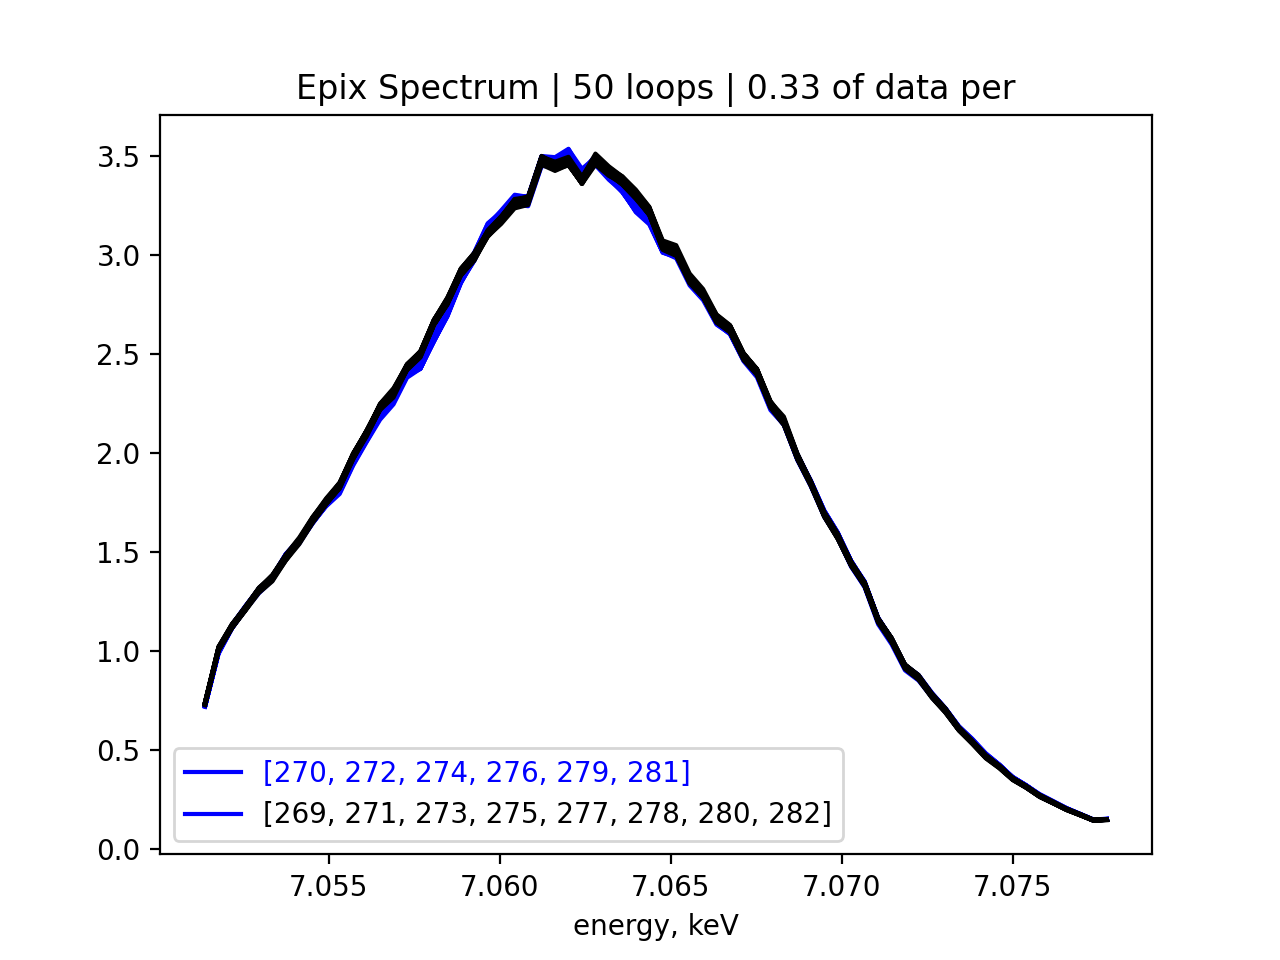

<IPython.core.display.Javascript object>


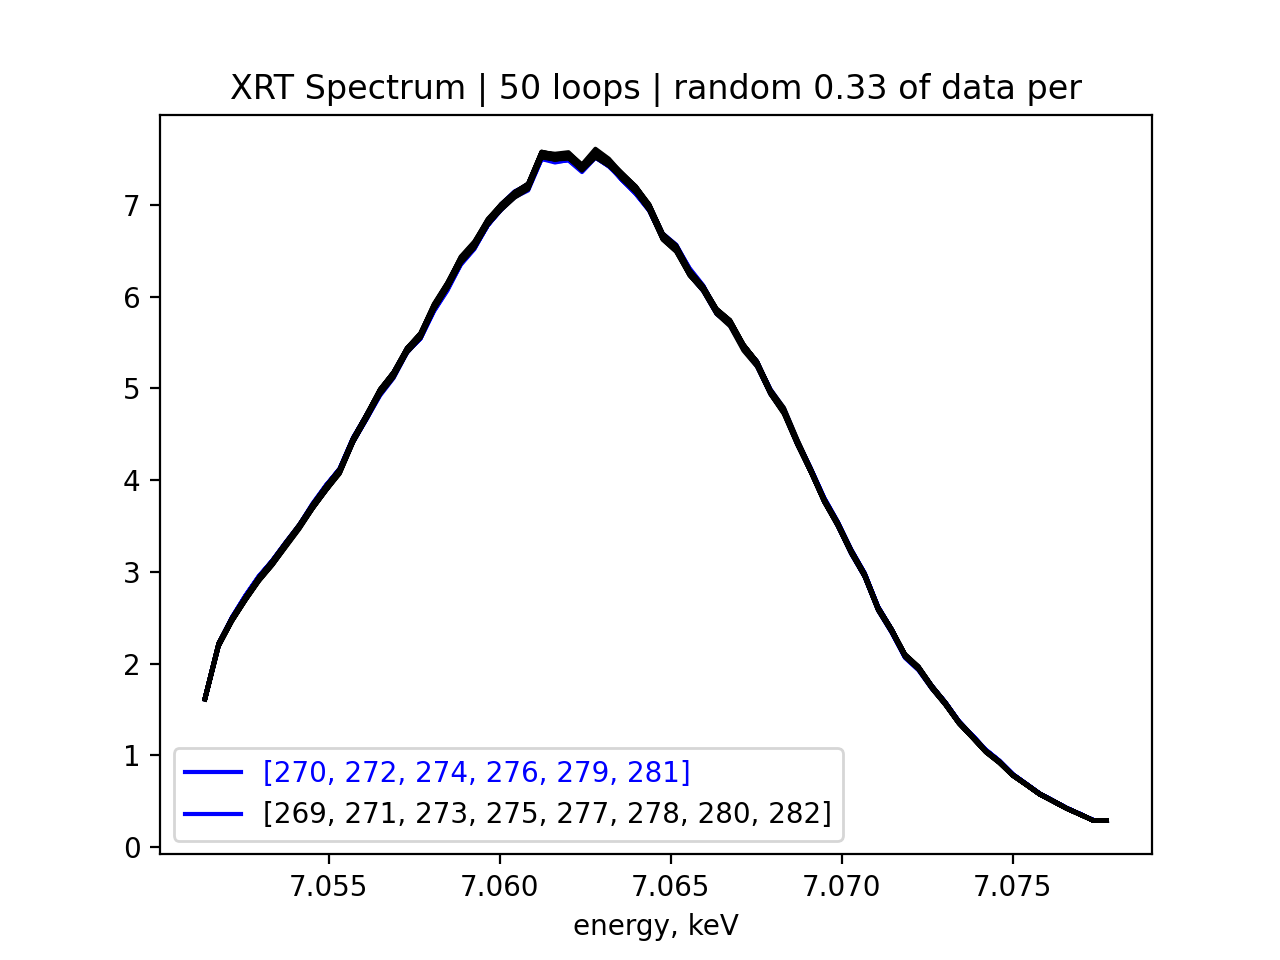

<IPython.core.display.Javascript object>


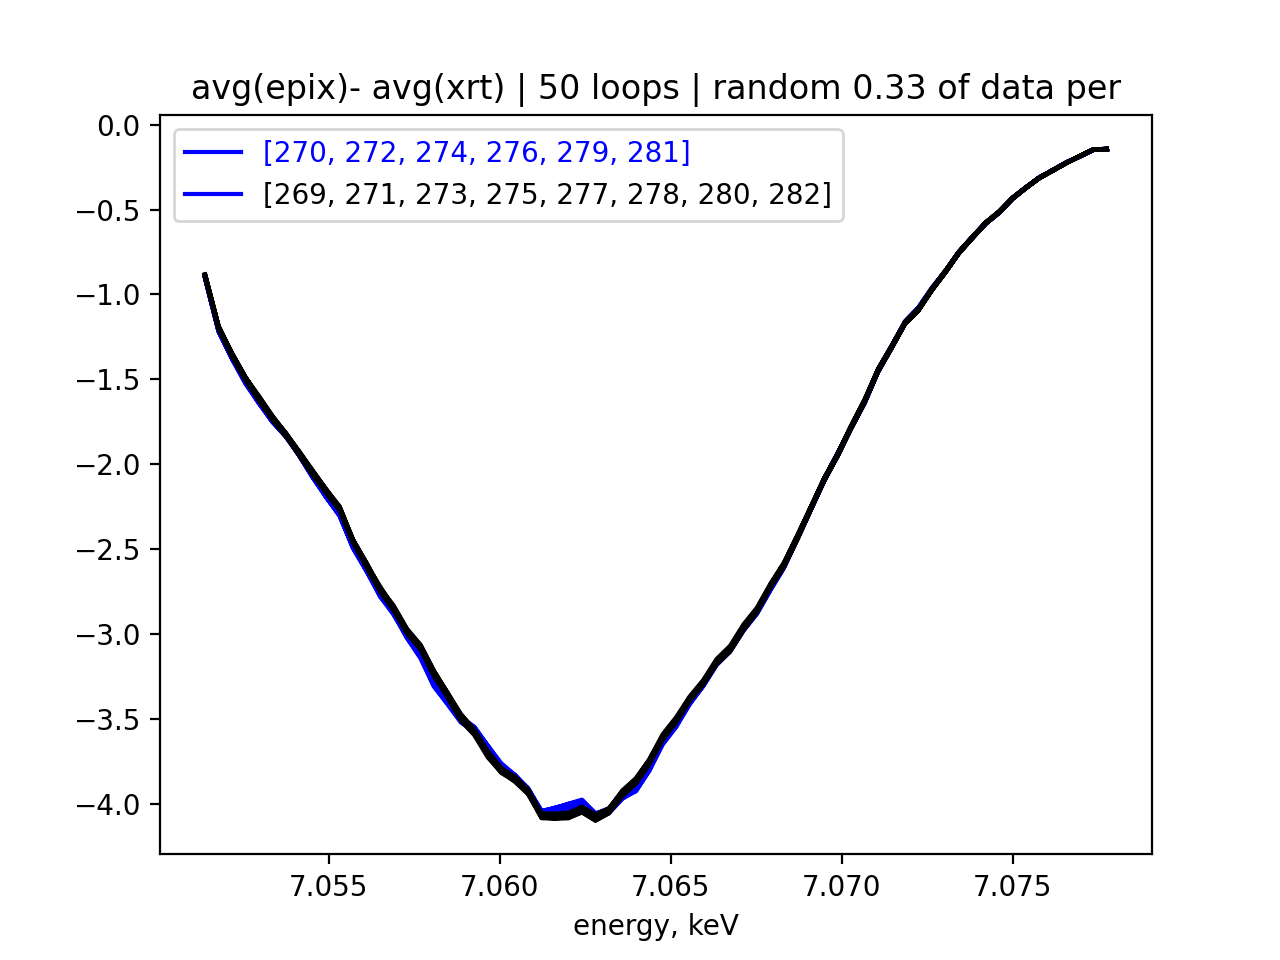

<IPython.core.display.Javascript object>


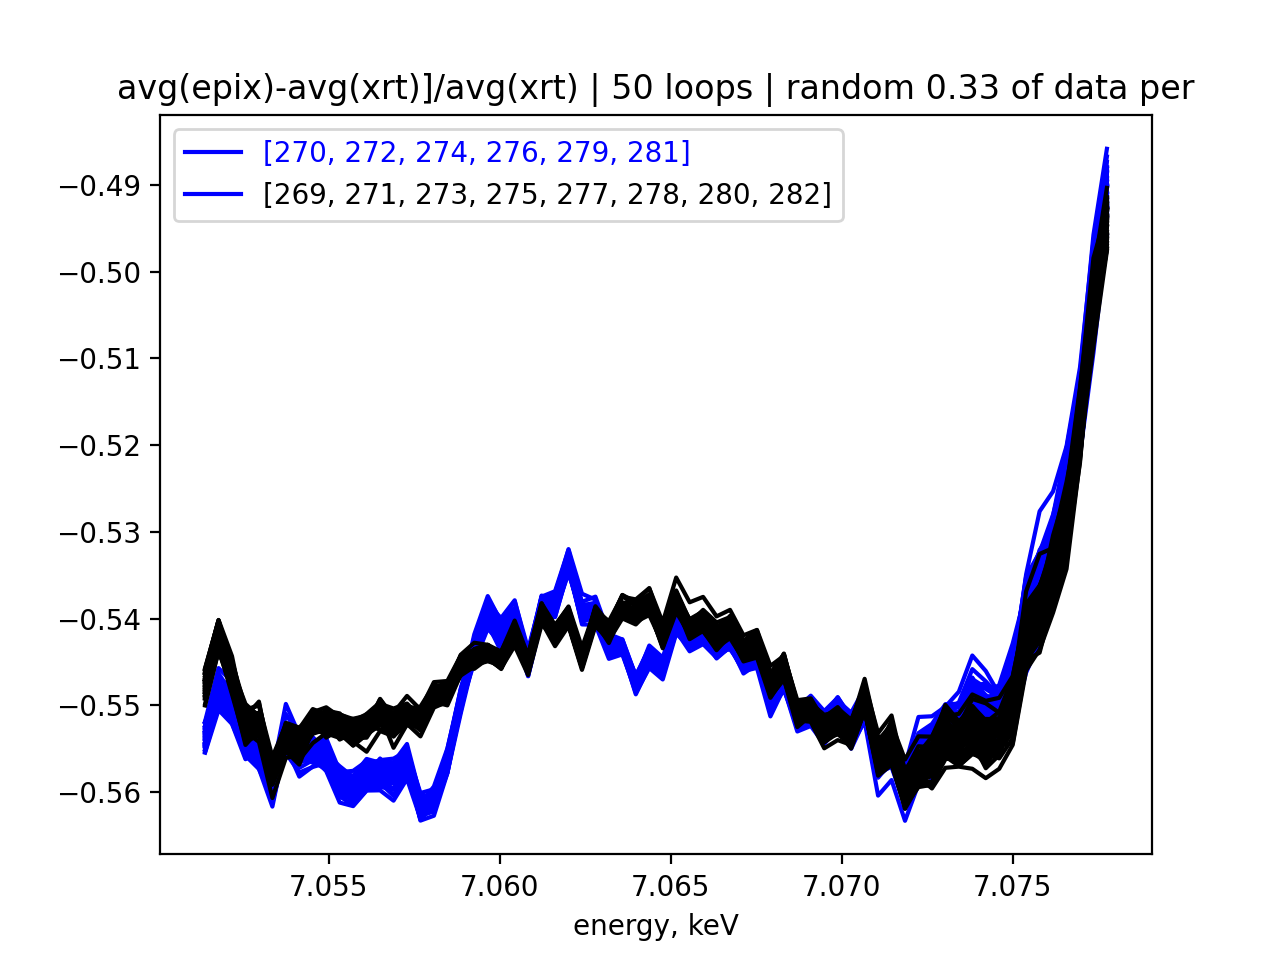

<IPython.core.display.Javascript object>


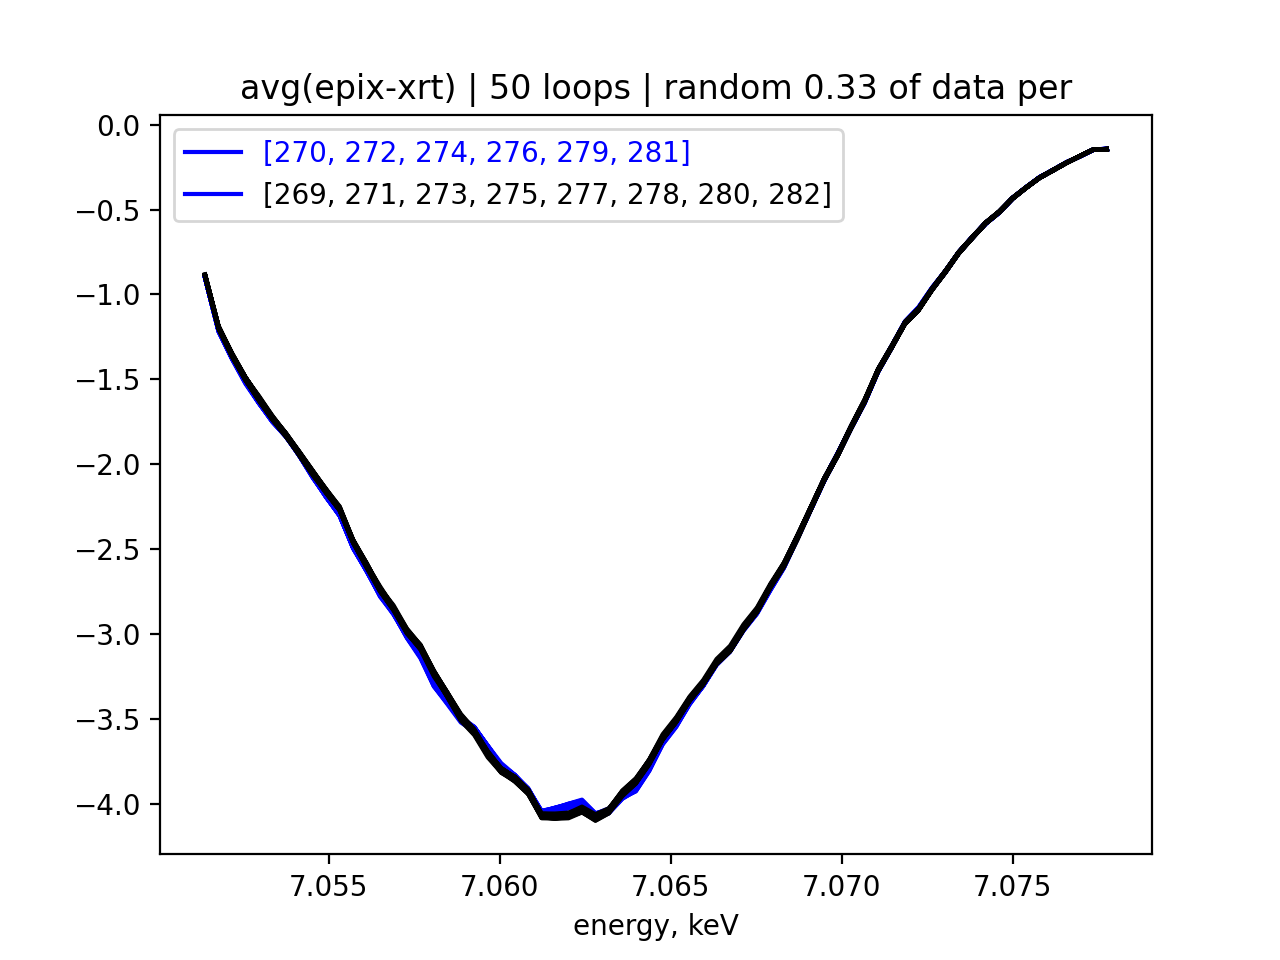

<IPython.core.display.Javascript object>


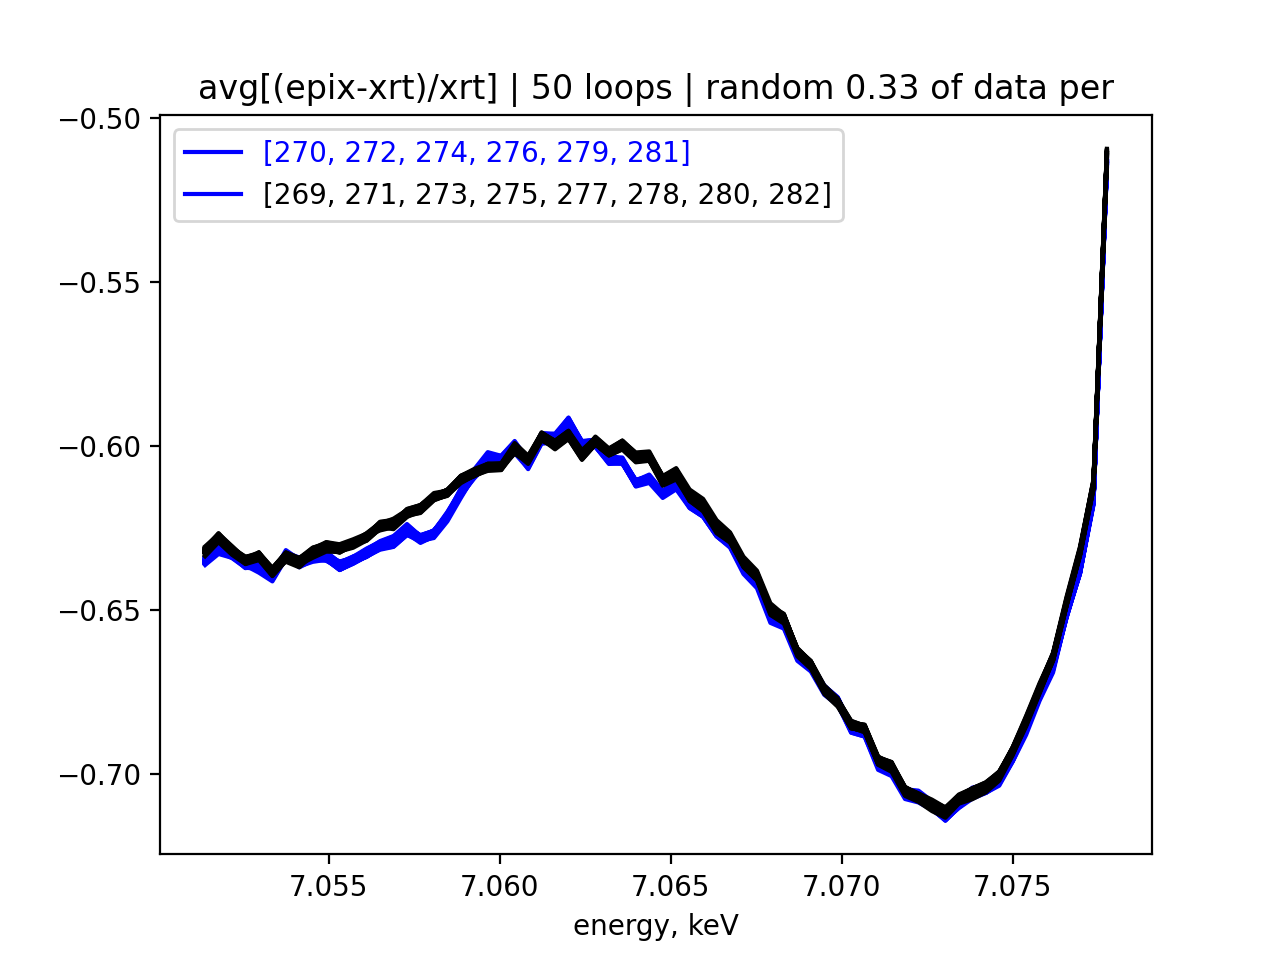

In [3]:
# set_0 = [217,219,221,223,225,227,229,231,233] #in focus
# set_1 = [218,220,222,224,226,228,230,232,234]

set_1 = [269,271,273,275,277,278,280,282]
set_0 = [270,272,274,276,279,281]

# set_0 = [178,179,180] # in focus with foil
# set_1 = [181,182,183] # out of focus with foil
# set_2 = [170,172,174,176,184,186,188] # in focus
# set_3 = [171,173,175,177,185,187,189] # out of focus
# set_0 = [170,172,174]
# set_0 = [115,117,120]           
# set_1 = [116,119,121]
# set_2 = [136,138,140]
# set_3 = [137,139,141]
# set_4 = [124,126,128]
# set_5 = [123,125,127]
# set_6 = [129,131,133]
# set_7 = [130,132,135]

spec_cal_runs = [[268]]  # Select runs with no sample in line

scans_to_plot = set_0,set_1#,set_2,set_3#,set_4,set_5,set_6,set_7
                         

plot_conds = [True,True,True,True] # epix, xrt, resid, deltaT_T
plot_meanwise = True                 # deltaT_T like avg(epix)-avg(xrt))/avg(xrt)
plot_shotwise = True                  # deltaT_T like avg[(epix-xrt)/xrt] shot by shot
bootstrap = [True,50,1/3]            # how many loops, and what random fraction of data per loop



#################################      DON'T WORRY ABOUT THE LINES UNDER THIS #########################################
if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
runs = runs.tolist()
input_vars = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas = load_pro.load_pro(runs)
print(pro_datas)
plot_pro.plot_lots(pro_datas,input_vars)


In [6]:
scans_to_plot = input_vars[0]
spec_cal_runs = input_vars[1]
xrt_plot = input_vars[2][1]
epix_plot = input_vars[2][0]
resid_plot = input_vars[2][2]
deltaT_T_plot = input_vars[2][3]
plot_shotwise = input_vars[3]
plot_meanwise = input_vars[4]
runs = input_vars[5]
bootstrapped = input_vars[6]
energy = pro_datas[0].epix_energy_windowed

shots_in_scale = plot_average.gather_shots(pro_datas,[spec_cal_runs,1,runs])
scale = np.mean(np.mean(shots_in_scale[1],0),0)/np.mean(np.mean(shots_in_scale[0],0),0)

compare = np.asarray(plot_average.gather_shots(pro_datas,[scans_to_plot,1,runs]))
epix_means = [np.mean(compare[1][i],0) for i in range(0,compare[0].shape[0])]
xrt_means = [np.mean(scale*compare[0][i],0) for i in range(0,compare[0].shape[0])]

epix_std = [(np.std(compare[1][i],0)) for i in range(0,compare[0].shape[0])]
xrt_std = [np.std(scale*compare[0][i],0) for i in range(0,compare[0].shape[0])]
epix_stde = [(np.std(compare[1][i],0))/np.sqrt(len(epix_means)) for i in range(0,compare[0].shape[0])]
xrt_stde = [np.std(scale*compare[0][i],0)/np.sqrt(len(xrt_means)) for i in range(0,compare[0].shape[0])]

resid_means =[epix_means[i]-xrt_means[i] for i in range(0,compare[0].shape[0])]
deltaT_T_means =[(resid_means[i]/xrt_means[i]) for i in range(0,compare[0].shape[0])]
resid_std =[epix_std[i]-xrt_std[i] for i in range(0,compare[0].shape[0])]
deltaT_T_std =[(resid_std[i]/xrt_std[i]) for i in range(0,compare[0].shape[0])]

resid_sbs = [compare[1][i]-(scale*compare[0][i]) for i in range(0,compare[0].shape[0])]
deltaT_T_sbs = [(resid_sbs[i])/(scale*compare[0][i]) for i in range(0,compare[0].shape[0])]        

# epix_shots = [compare[i][1] for i in range(0,len(compare))]



[[166, 167]]
([178, 179, 180], [181, 182, 183], [170, 172, 174, 176, 184, 186, 188], [171, 173, 175, 177, 185, 187, 189])


<IPython.core.display.Javascript object>


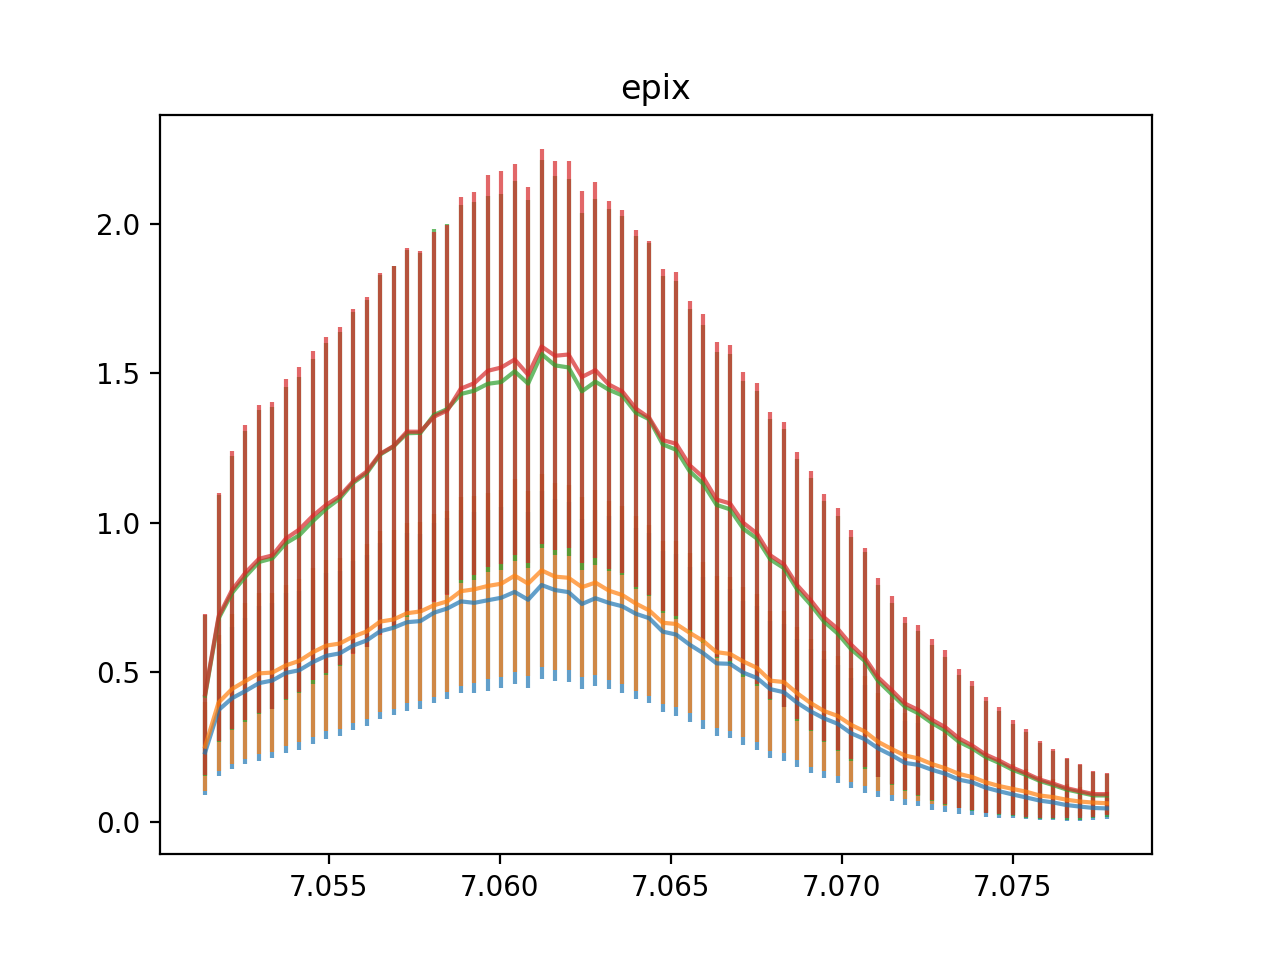

<IPython.core.display.Javascript object>


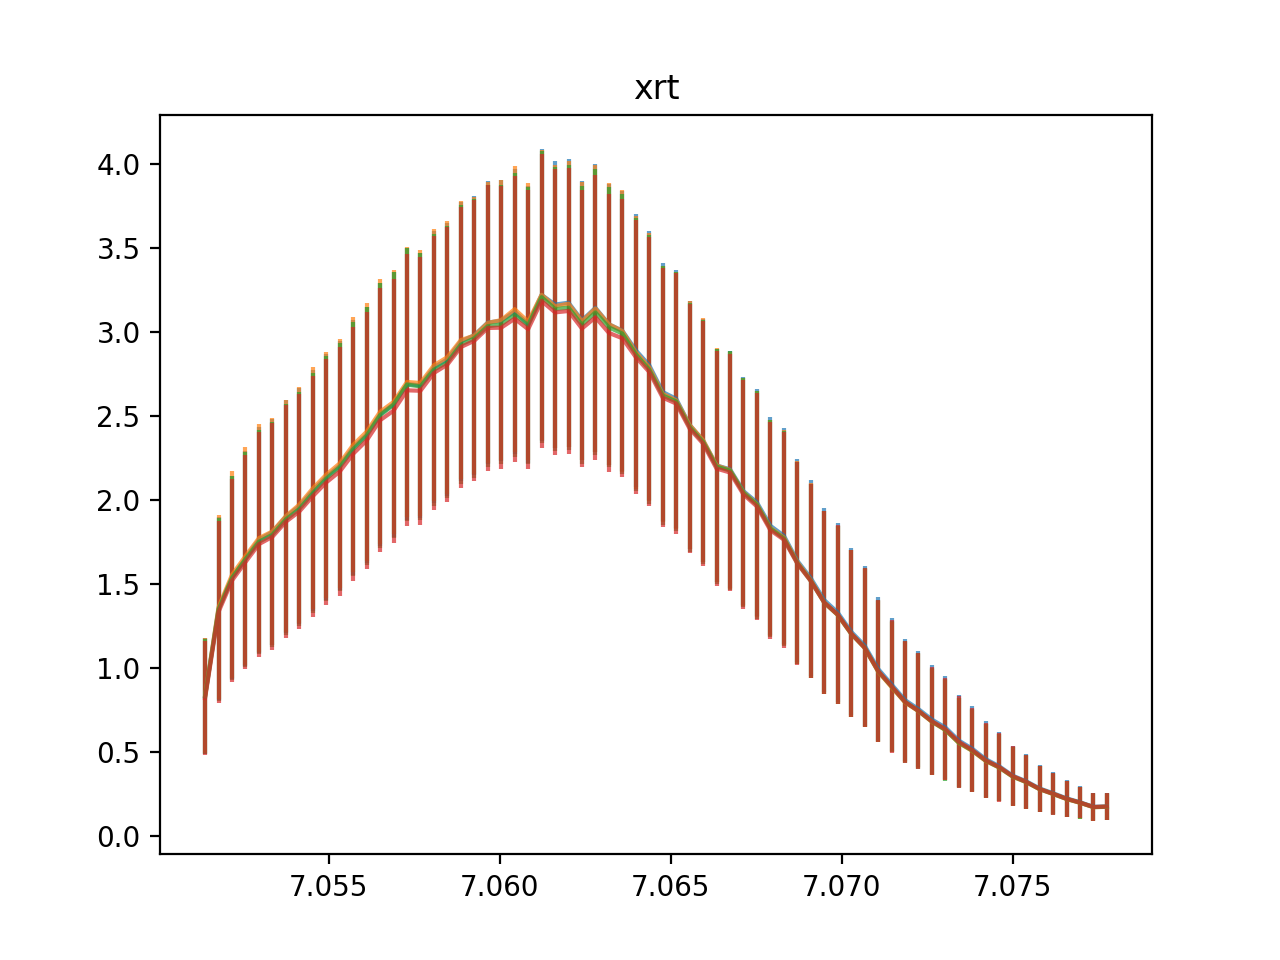

In [7]:
plt.figure()
[plt.errorbar(energy,epix_means[i],yerr = epix_stde[i],alpha = 0.7) for i in range(0,len(epix_means))]
plt.title('epix')
plt.show()

plt.figure()
[plt.errorbar(energy,xrt_means[i],yerr = xrt_stde[i],alpha = 0.7) for i in range(0,len(xrt_means))]
plt.title('xrt')
plt.show()

In [ ]:
# # 252: 744, 716

# # 280: 744, 717

# 225: 	-7.439998
#     -7.998000 IN
# 226: -7.439998
#     -5.998000 OUT
# 227:	-7.439998
#     -7.998000 IN
# 228: -7.439998
#     -5.998000 OUT
    
# 269:
#     -7.998000
# 270:
#     -6.825100
# 271:
#     -7.168800
# 272:
#     -6.828100
# 273:
#     -7.169400
# 274:
#     -6.832400
# 275:
#     -7.168800
# 276: 
#     -6.825000
# 277:
#     -7.167900
# 278:
#     -7.998000
# 279:
#     -6.828300
# 280:
#     -7.170600
# 281:
#     -6.824100
# 282:
#     -7.169200
    